In [442]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from datetime import datetime, date
import re
from IPython.display import display, HTML
from tabulate import tabulate

In [443]:
file_path='E:/Metro2/raw_data//'
# file_path='E:/Metro2/artifacts//'
df=pd.read_csv(file_path+'Data.csv')
df = df[df['9'] <= 220]
df = df[~(df['10'] == 'Bus')]
df = df[~(df['11'] == 'Bus')]
df = df[~(df['11'] =='Any public transport ')]

In [444]:
def remove_non_english_text(text):
    return re.sub(r'\s*\([^)]*\)', '', text)

# Apply the function to the specified columns
for col in ['12c(a)', '12c(b)', '12c(c)', '12c(d)', '12c(e)']:
    df[col] = df[col].apply(remove_non_english_text)

In [445]:
bicycle_dict={
 'Will use for access trip, Will use for egress trip':'Will use for both trips',
 'Will use for access trip, Will use for egress trip, Will not use for both trips':'all 3 selected',
 'Will use for access trip, Will not use for both trips':'selected 1 and 3',
 'Will use for egress trip, Will not use for both trips':'selected 2 and 3',
 'Will use for egress trip':'Will use for egress trip',
 'Will not use for both trips':'Will not use for both trips',
 'Will use for access trip':'Will use for access trip'
 }

df['12c(a)']=df['12c(a)'].map(bicycle_dict)
df['12c(b)']=df['12c(b)'].map(bicycle_dict)
df['12c(c)']=df['12c(c)'].map(bicycle_dict)
df['12c(d)']=df['12c(d)'].map(bicycle_dict)
df['12c(e)']=df['12c(e)'].map(bicycle_dict)

In [446]:
# drop the entries in 12c(a) to 12c(e) where the entries are 'all 3 selected', 'selected 1 and 3', 'selected 2 and 3'
# List of columns to check
columns_to_check = ['12c(a)', '12c(b)', '12c(c)', '12c(d)', '12c(e)']

# List of entries to drop
entries_to_drop = ['all 3 selected', 'selected 1 and 3', 'selected 2 and 3']

# Drop rows that contain any of the specified entries in the specified columns
df= df[~df[columns_to_check].isin(entries_to_drop).any(axis=1)]

In [447]:
for column in df.select_dtypes(include='object').columns:
    df[column] = df[column].str.replace(r'\(.*\)', '', regex=True)

In [448]:
display(HTML(f"<h2>Age and Gender</h2>"))

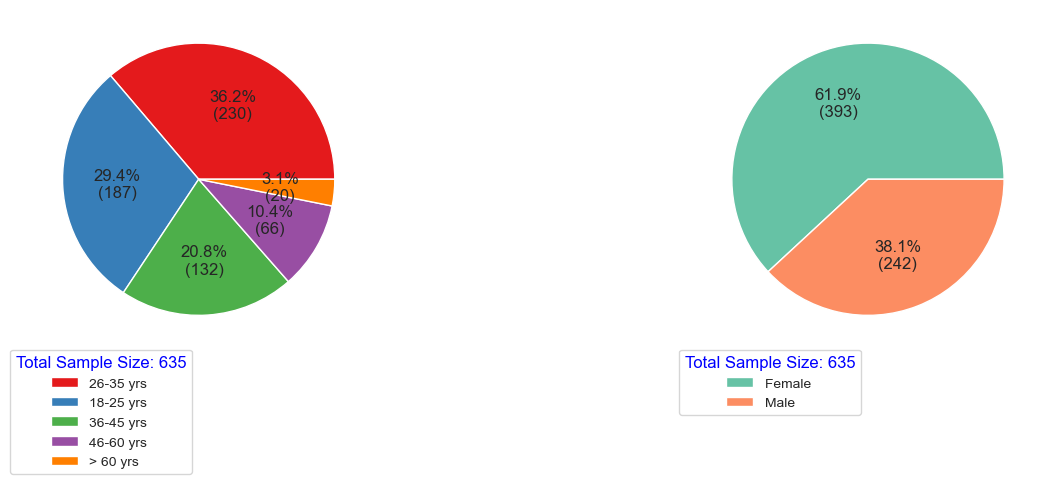

In [449]:
def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)

# Set Seaborn style
sns.set(style="whitegrid")

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Define color schemes
colors_age = sns.color_palette("Set1", len(df['18'].value_counts()))
colors_gender = sns.color_palette("Set2", len(df['17'].value_counts()))

# Get the size of the DataFrame
df_size = df.shape[0]

# Pie chart for age distribution
age_counts = df['18'].value_counts()
age_counts.plot.pie(autopct=lambda pct: func(pct, age_counts), ax=ax[0], shadow=False, colors=colors_age, labels=None)
# ax[0].set_title('Age Distribution')
ax[0].set_ylabel('')  # Remove y-label

# Add legend for age distribution with DataFrame size
age_labels = age_counts.index
legend_age = ax[0].legend(age_labels, loc="best", bbox_to_anchor=(0.5, 0.02), fontsize='small', title=f"Total Sample Size: {df_size}")
plt.setp(legend_age.get_title(), fontsize='medium', color='blue')

# Pie chart for gender distribution
gender_counts = df['17'].value_counts()
gender_counts.plot.pie(autopct=lambda pct: func(pct, gender_counts), ax=ax[1], shadow=False, colors=colors_gender, labels=None)
# ax[1].set_title('Gender Distribution')
ax[1].set_ylabel('')  # Remove y-label

# Add legend for gender distribution with DataFrame size
gender_labels = gender_counts.index
legend_gender = ax[1].legend(gender_labels, loc="best", bbox_to_anchor=(0.5, 0.02), fontsize='small', title=f"Total Sample Size: {df_size}")
plt.setp(legend_gender.get_title(), fontsize='medium', color='blue')

plt.tight_layout()
plt.show()

In [450]:
display(HTML(f"<h2>Education and occupation</h2>"))

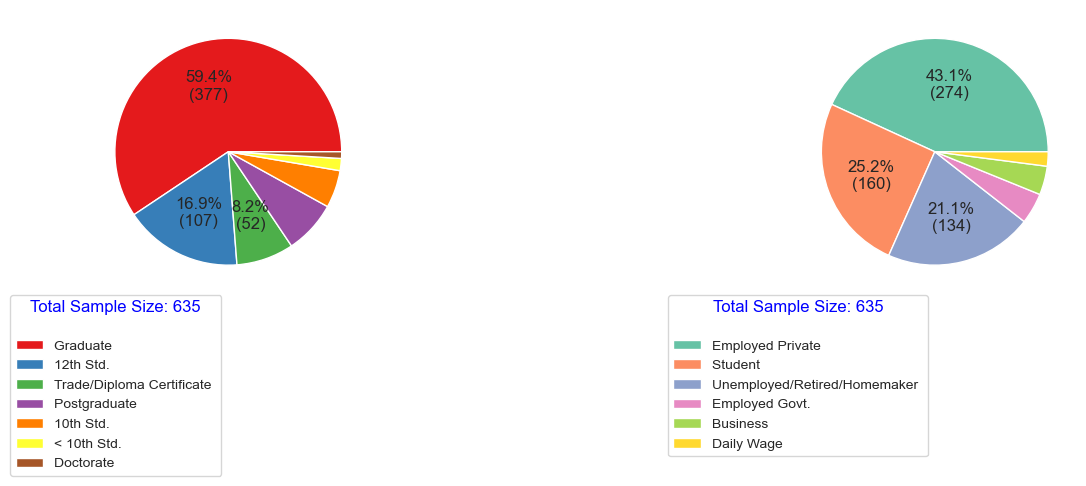

In [451]:
def func(pct, allvals, top_indices):
    absolute = int(round(pct / 100. * np.sum(allvals)))
    index = np.argmax(np.array(allvals) == absolute)
    if index in top_indices:
        return "{:.1f}%\n({:d})".format(pct, absolute)
    else:
        return ""

# Helper function to get indices of top 3 sectors
def get_top_indices(counts):
    sorted_indices = counts.argsort()[::-1]
    return sorted_indices[:3]

# Set Seaborn style
sns.set(style="whitegrid")

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Define color schemes
colors_age = sns.color_palette("Set1", len(df['19'].value_counts()))
colors_gender = sns.color_palette("Set2", len(df['20'].value_counts()))

# Get the size of the DataFrame
df_size = df.shape[0]

# Pie chart for age distribution
age_counts = df['19'].value_counts()
top_age_indices = get_top_indices(age_counts.values)
age_counts.plot.pie(
    autopct=lambda pct: func(pct, age_counts.values, top_age_indices),
    ax=ax[0], shadow=False, colors=colors_age, labels=None
)
# ax[0].set_title('Age Distribution')
ax[0].set_ylabel('')  # Remove y-label

# Add legend for age distribution with DataFrame size
age_labels = age_counts.index
legend_age = ax[0].legend(
    age_labels, loc="best", bbox_to_anchor=(0.5, 0.02),
    fontsize='small', title=f"Total Sample Size: {df_size}\n"
)
plt.setp(legend_age.get_title(), fontsize='medium', color='blue')

# Pie chart for gender distribution
gender_counts = df['20'].value_counts()
top_gender_indices = get_top_indices(gender_counts.values)
gender_counts.plot.pie(
    autopct=lambda pct: func(pct, gender_counts.values, top_gender_indices),
    ax=ax[1], shadow=False, colors=colors_gender, labels=None
)
# ax[1].set_title('Gender Distribution')
ax[1].set_ylabel('')  # Remove y-label

# Add legend for gender distribution with DataFrame size
gender_labels = gender_counts.index
legend_gender = ax[1].legend(
    gender_labels, loc="best", bbox_to_anchor=(0.5, 0.02),
    fontsize='small', title=f"Total Sample Size: {df_size}\n"
)
plt.setp(legend_gender.get_title(), fontsize='medium', color='blue')

plt.tight_layout()
plt.show()

In [452]:
display(HTML(f"<h2>Income and Vehicle ownership</h2>"))

In [453]:
def convert_value(val):
    if val == '4+':
        return 4
    else:
        return int(val)

# Apply the conversion function to the columns
df['22b'] = df['22b'].apply(convert_value)
df['22c'] = df['22c'].apply(convert_value)
df['22d'] = df['22d'].apply(convert_value)

# Sum the values of the three columns to create the 'VEH' column
df['VEH'] = df[['22b', '22c', '22d']].sum(axis=1)

# Display the DataFrame


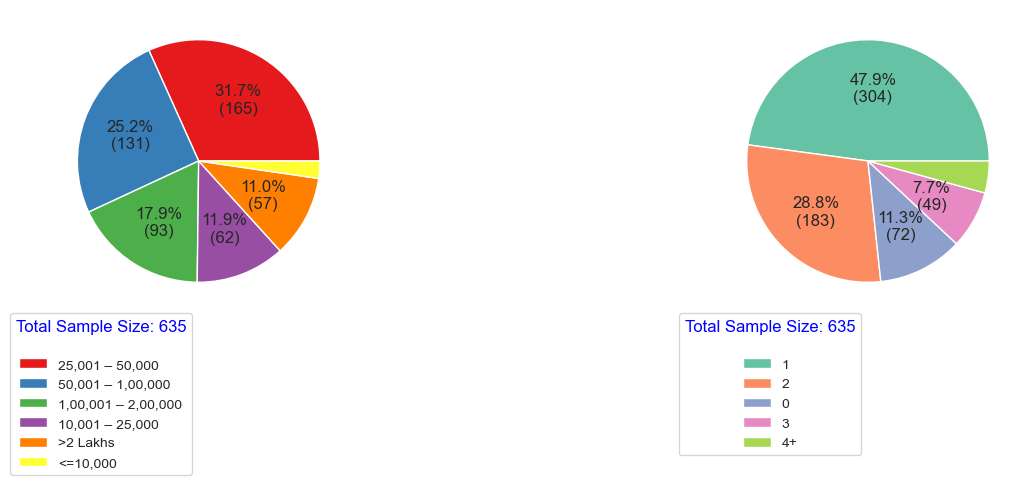

In [454]:
df['VEH'] = df['VEH'].apply(lambda x: '4+' if x >= 4 else str(x))

def func(pct, allvals, top_indices):
    absolute = int(round(pct / 100. * np.sum(allvals)))
    index = np.argmax(np.array(allvals) == absolute)
    if index in top_indices:
        return "{:.1f}%\n({:d})".format(pct, absolute)
    else:
        return ""

# Helper function to get indices of top 5 sectors
def get_top_indices(counts):
    sorted_indices = counts.argsort()[::-1]
    return sorted_indices[:5]

def get_top_indices2(counts):
    sorted_indices = counts.argsort()[::-1]
    return sorted_indices[:4]

# Set Seaborn style
sns.set(style="whitegrid")

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Define color schemes
colors_age = sns.color_palette("Set1", len(df['21'].value_counts()))
colors_gender = sns.color_palette("Set2", len(df['VEH'].value_counts()))

# Get the size of the DataFrame
df_size = df.shape[0]

# Pie chart for age distribution
age_counts = df['21'].value_counts()
top_age_indices = get_top_indices(age_counts.values)
age_counts.plot.pie(
    autopct=lambda pct: func(pct, age_counts.values, top_age_indices),
    ax=ax[0], shadow=False, colors=colors_age, labels=None
)
# ax[0].set_title('Age Distribution')
ax[0].set_ylabel('')  # Remove y-label

# Add legend for age distribution with DataFrame size
age_labels = age_counts.index
legend_age = ax[0].legend(
    age_labels, loc="best", bbox_to_anchor=(0.5, 0.02),
    fontsize='small', title=f"Total Sample Size: {df_size}\n"
)
plt.setp(legend_age.get_title(), fontsize='medium', color='blue')

# Pie chart for gender distribution
gender_counts = df['VEH'].value_counts()
top_gender_indices = get_top_indices2(gender_counts.values)
gender_counts.plot.pie(
    autopct=lambda pct: func(pct, gender_counts.values, top_gender_indices),
    ax=ax[1], shadow=False, colors=colors_gender, labels=None
)
# ax[1].set_title('Gender Distribution')
ax[1].set_ylabel('')  # Remove y-label

# Add legend for gender distribution with DataFrame size
gender_labels = gender_counts.index
legend_gender = ax[1].legend(
    gender_labels, loc="best", bbox_to_anchor=(0.5, 0.02),
    fontsize='small', title=f"Total Sample Size: {df_size}\n"
)
plt.setp(legend_gender.get_title(), fontsize='medium', color='blue')

plt.tight_layout()
plt.show()


In [455]:
trip_types = {
    'Home based work': [('Home ', 'Work/Business place '), ('Work/Business place ', 'Home ')],
    'Home based education': [('Home ', 'School/College '), ('School/College ', 'Home ')],
    'Home based other': [('Home ', 'Other '), ('Other ', 'Home '),('Home ', 'Restaurant '), ('Restaurant ', 'Home '),
                         ('Home ', 'Shopping place '), ('Shopping place ', 'Home '),('Home ', 'Social/Religious place '), ('Social/Religious place ', 'Home '),
                         ('Home ', 'Friend/Relative’s place '), ('Friend/Relative’s place ', 'Home '),],
}


In [456]:
all_trips = set((row['6'], row['4']) for _, row in df.iterrows())
categorized_trips = set(trip for trips in trip_types.values() for trip in trips)
non_home_based_trips = all_trips - categorized_trips
trip_types['Non home based'] = list(non_home_based_trips)

# Calculate the number of trips and percentages
results = []
trip_totals = {}
trip_percentages = {}

for trip_type, pairs in trip_types.items():
    if trip_type == 'Non home based':
        total_trips = sum(len(df[(df['6'] == origin) & (df['4'] == destination)]) for origin, destination in non_home_based_trips)
        trip_totals[trip_type] = total_trips
        trip_percentage = total_trips / len(df) * 100 if len(df) > 0 else 0
        trip_percentages[trip_type] = round(trip_percentage,2)
        results.append([trip_type, 'Non home', 'Non home', total_trips])
    else:
        total_trips = sum(len(df[(df['6'] == origin) & (df['4'] == destination)]) for origin, destination in pairs)
        trip_totals[trip_type] = total_trips
        trip_percentage = total_trips / len(df) * 100 if len(df) > 0 else 0
        trip_percentages[trip_type] = trip_percentage
        for origin, destination in pairs:
            trip_count = len(df[(df['6'] == origin) & (df['4'] == destination)])
            results.append([trip_type, origin, destination, trip_count])

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=['Type of trip', 'Origin', 'Destination', 'No of trips'])

# Calculate %OD based
total_trips = len(df)
results_df['%OD based'] = round(results_df['No of trips'] / total_trips * 100,2)

# Adding Sl No
results_df.insert(0, 'Sl No', range(1, len(results_df) + 1))

# Grouping by 'Type of trip'
grouped_df = results_df.groupby('Type of trip')

# Function to create a table with solid lines and centered text
def print_solid_table(df, trip_totals, trip_percentages):
    header = ["Sl No", "Type of trip", "Origin", "Destination", "No of trips", "%(type of trips)", "%OD based"]
    max_len = {col: max(df[col].astype(str).map(len).max(), len(col)) if col in df else len(col) for col in header}
    
    def draw_line():
        line = "+"
        for col in header:
            line += "-" * (max_len[col] + 2) + "+"
        print(line)

    def draw_row(row, show_type, show_sl_no, show_percentage):
        line = "|"
        for col in header:
            if col == "Type of trip" and not show_type:
                line += " " * (max_len[col] + 2) + "|"
            elif col == "Sl No" and not show_sl_no:
                line += " " * (max_len[col] + 2) + "|"
            elif col == "%(type of trips)" and not show_percentage:
                line += " " * (max_len[col] + 2) + "|"
            else:
                line += " " + str(row[col]).center(max_len[col]) + " |"
        print(line)

    def draw_merged_row(index, label, count, percentage):
        sl_no = str(index)
        line = "| " + sl_no.center(max_len["Sl No"]) + " | " + label.center(max_len["Type of trip"]) + " |"
        line += " " * (max_len["Origin"] + 2) + "|"
        line += " " * (max_len["Destination"] + 2) + "|"
        line += str(count).center(max_len["No of trips"] + 2) + "|"
        line += str(round(percentage, 2)).center(max_len["%(type of trips)"] + 2) + "|"
        line += " " * (max_len["%OD based"] + 2) + "|"
        print(line)

    draw_line()
    draw_row({col: col for col in header}, True, True, True)
    draw_line()
    
    sl_no = 1
    for trip_type, group in grouped_df:
        draw_merged_row(sl_no, trip_type, trip_totals[trip_type], trip_percentages[trip_type])
        type_trip_count = len(group)
        for i, (_, row) in enumerate(group.iterrows()):
            show_type = i < 0
            show_sl_no = i == -1
            draw_row(row, show_type, show_sl_no, False)
            type_trip_count -= 1
        draw_line()
        sl_no += 1

# Print the final table
print_solid_table(results_df, trip_totals, trip_percentages)

# Print the total number of samples
print(f"\nTotal number of samples: {total_trips}")

+-------+----------------------+--------------------------+--------------------------+-------------+------------------+-----------+
| Sl No |     Type of trip     |          Origin          |       Destination        | No of trips | %(type of trips) | %OD based |
+-------+----------------------+--------------------------+--------------------------+-------------+------------------+-----------+
|   1   | Home based education |                          |                          |      94     |       14.8       |           |
|       |                      |          Home            |     School/College       |      37     |                  |    5.83   |
|       |                      |     School/College       |          Home            |      57     |                  |    8.98   |
+-------+----------------------+--------------------------+--------------------------+-------------+------------------+-----------+
|   2   |   Home based other   |                          |                 

In [457]:
df['8'].unique()
trip_map={'Bus + Metro ':'Bus + Metro', 'Metro ':'Metro', 'Bus + metro + metro':'Bus + Metro', 'Metro + Bus ':'Metro + Bus',
       'Bus1 + Metro + Bus2 ':'Bus1 + Metro + Bus2', 'Bus + metro1 + metro2':'Bus + Metro', 'Railway+metro ':'Metro',
       'Metro + Metro':'Metro', 'Train + metro + bus':'Metro + Bus', 'Bus ':'Metro'}
df['8']=df['8'].map(trip_map)

In [458]:
display(HTML(f"<h2>Sequence of modes</h2>"))

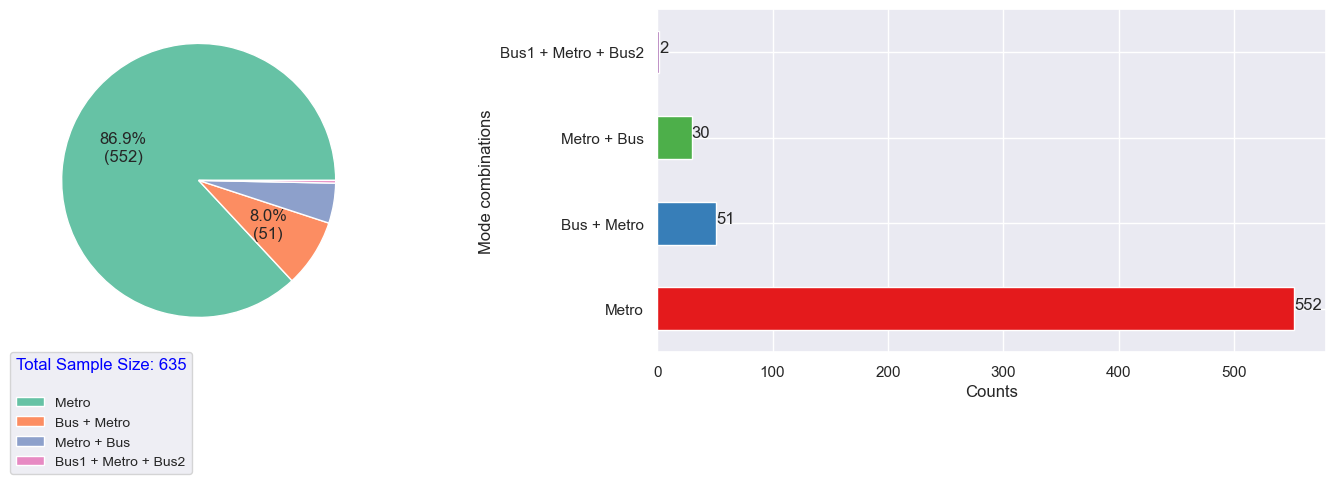

In [459]:
def func(pct, allvals, top_indices):
    absolute = int(round(pct / 100. * np.sum(allvals)))
    index = np.argmax(np.array(allvals) == absolute)
    if index in top_indices:
        return "{:.1f}%\n({:d})".format(pct, absolute)
    else:
        return ""

# Helper function to get indices of top sectors
def get_top_indices(counts, n=2):
    sorted_indices = counts.argsort()[::-1]
    return sorted_indices[:n]

# Set Seaborn style
sns.set(style="darkgrid")

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Define color schemes
colors_gender = sns.color_palette("Set2", len(df['8'].value_counts()))
colors_age = sns.color_palette("Set1", len(df['8'].value_counts()))

# Get the size of the DataFrame
df_size = df.shape[0]

# Pie chart for gender distribution
gender_counts = df['8'].value_counts()
top_gender_indices = get_top_indices(gender_counts.values)
gender_counts.plot.pie(
    autopct=lambda pct: func(pct, gender_counts.values, top_gender_indices),
    ax=ax[0], shadow=False, colors=colors_gender, labels=None
)
# ax[0].set_title('Gender Distribution')
ax[0].set_ylabel('')  # Remove y-label

# Add legend for gender distribution with DataFrame size
gender_labels = gender_counts.index
legend_gender = ax[0].legend(
    gender_labels, loc="best", bbox_to_anchor=(0.5, 0.02),
    fontsize='small', title=f"Total Sample Size: {df_size}\n"
)
plt.setp(legend_gender.get_title(), fontsize='medium', color='blue')

# Horizontal bar chart for age distribution
age_counts = df['8'].value_counts()
age_counts.plot.barh(ax=ax[1], color=colors_age)
ax[1].set_xlabel('Counts')
ax[1].set_ylabel('Mode combinations')
# ax[1].set_title('Age Distribution')
for index, value in enumerate(age_counts):
    ax[1].text(value, index, str(value))

plt.tight_layout()
plt.show()

In [460]:
display(HTML(f"<h2>Door to door travel time</h2>"))

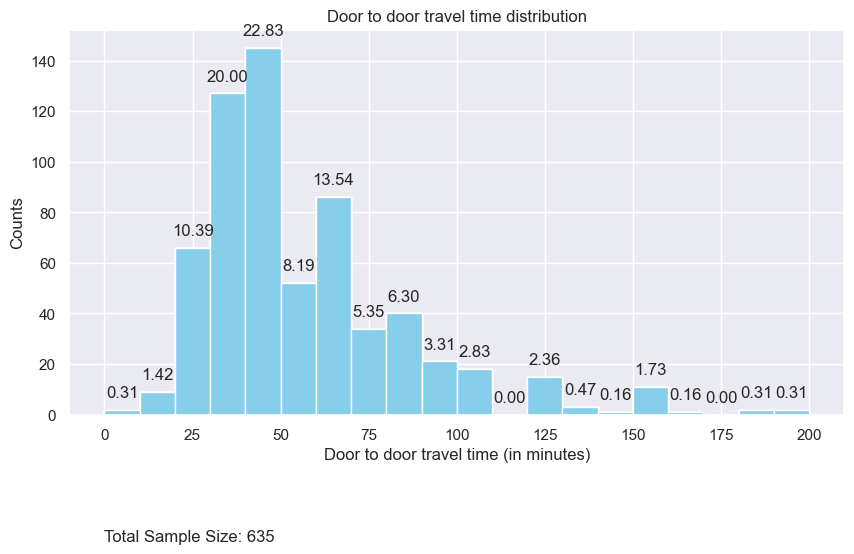

In [461]:
df['9'].describe()

plt.figure(figsize=(10, 5))

# Plot histogram with specified color
plt.hist(df['9'], bins=range(0, int(df['9'].max()) + 10, 10), color='skyblue')

# Add labels and title
plt.xlabel('Door to door travel time (in minutes)')
plt.ylabel('Counts')
plt.title('Door to door travel time distribution')

# Add percentage on top of each bar
total_count = len(df['9'])
for i in range(len(plt.hist(df['9'], bins=range(0, int(df['9'].max()) + 10, 10), color='skyblue')[0])):
    count = plt.hist(df['9'], bins=range(0, int(df['9'].max()) + 10, 10), color='skyblue')[0][i]
    percentage = count / total_count * 100
    plt.text(plt.hist(df['9'], bins=range(0, int(df['9'].max()) + 10, 10), color='skyblue')[1][i] + 5, count + 5, f'{percentage:.2f}', ha='center')

# Add total sample size and size of dataframe below the plot
plt.text(0, -50, f'Total Sample Size: {total_count}', fontsize=12)
# plt.text(0, -70, f'Size of DataFrame: {len(df)}', fontsize=12)

plt.show()

In [462]:
df['10'].unique()
access_map={'Drove and parked a two-Wheeler ':'Drove and parked a two-Wheeler ', 'Walk ':'Walk ',
       'Dropped-off by friends/family members/others using two-wheeler ':'Dropped-off by others',
       'Drove and parked a car ':'Drove and parked a car ', 'Auto Rickshaw ':'Auto Rickshaw ', 'Ola/Uber car ':'Ola/Uber car ',
       'Dropped-off by friends/family members/others using car ':'Dropped-off by others',
       'Rapido/uber moto/Ola App two-wheeler ':'Rapido/Uber moto/Ola App two-wheeler '}
df['10']=df['10'].map(access_map)

In [463]:
display(HTML(f"<h2>Access modes</h2>"))

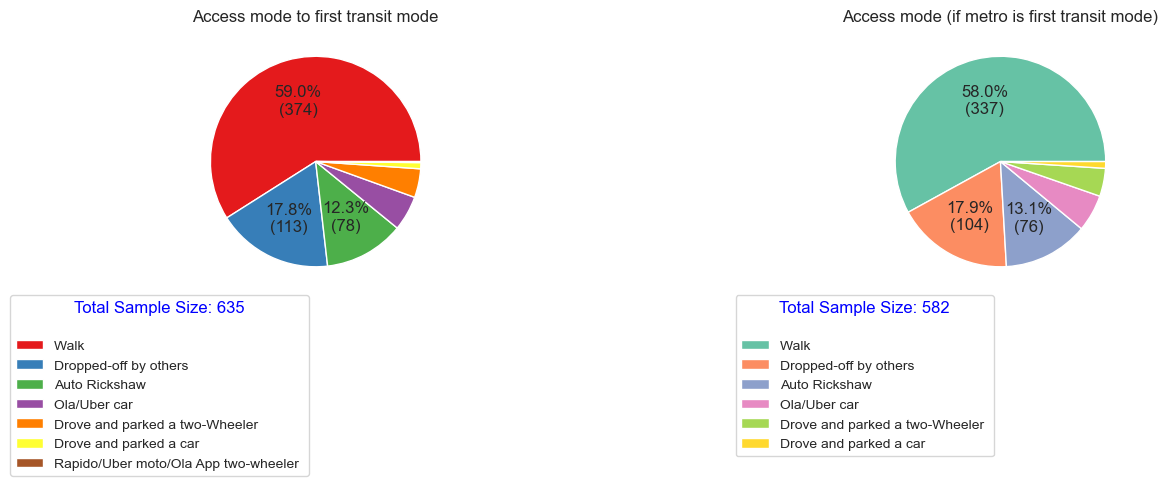

In [464]:
def func(pct, allvals, top_indices):
    absolute = int(round(pct / 100. * np.sum(allvals)))
    index = np.argmax(np.array(allvals) == absolute)
    if index in top_indices:
        return "{:.1f}%\n({:d})".format(pct, absolute)
    else:
        return ""

# Helper function to get indices of top 3 sectors
def get_top_indices(counts):
    sorted_indices = counts.argsort()[::-1]
    return sorted_indices[:3]

# Set Seaborn style
sns.set(style="whitegrid")

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

df2=df.loc[(df['8']=='Metro') | (df['8']=='Metro + Bus')]

# Define color schemes
colors_age = sns.color_palette("Set1", len(df['10'].value_counts()))
colors_gender = sns.color_palette("Set2", len(df2['10'].value_counts()))

# Get the size of the DataFrame
df_size = df.shape[0]
df_size2=df2.shape[0]

# Pie chart for age distribution
age_counts = df['10'].value_counts()
top_age_indices = get_top_indices(age_counts.values)
age_counts.plot.pie(
    autopct=lambda pct: func(pct, age_counts.values, top_age_indices),
    ax=ax[0], shadow=False, colors=colors_age, labels=None
)
ax[0].set_title('Access mode to first transit mode')
ax[0].set_ylabel('')  # Remove y-label

# Add legend for age distribution with DataFrame size
age_labels = age_counts.index
legend_age = ax[0].legend(
    age_labels, loc="best", bbox_to_anchor=(0.5, 0.02),
    fontsize='small', title=f"Total Sample Size: {df_size}\n"
)
plt.setp(legend_age.get_title(), fontsize='medium', color='blue')

# Pie chart for gender distribution
gender_counts = df2['10'].value_counts()
top_gender_indices = get_top_indices(gender_counts.values)
gender_counts.plot.pie(
    autopct=lambda pct: func(pct, gender_counts.values, top_gender_indices),
    ax=ax[1], shadow=False, colors=colors_gender, labels=None
)
ax[1].set_title('Access mode (if metro is first transit mode)')
ax[1].set_ylabel('')  # Remove y-label

# Add legend for gender distribution with DataFrame size
gender_labels = gender_counts.index
legend_gender = ax[1].legend(
    gender_labels, loc="best", bbox_to_anchor=(0.5, 0.02),
    fontsize='small', title=f"Total Sample Size: {df_size2}\n"
)
plt.setp(legend_gender.get_title(), fontsize='medium', color='blue')

plt.tight_layout()
plt.show()

In [465]:
display(HTML(f"<h2>Access travel time</h2>"))

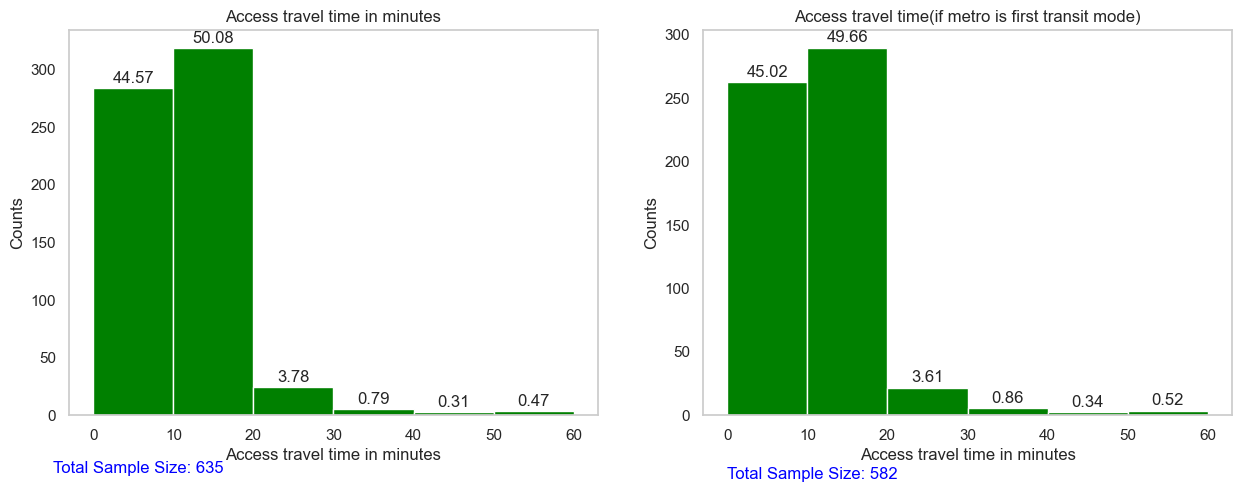

In [466]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot histogram for the left subplot
# Assuming df['10'] contains the data for the left histogram
axs[0].hist(df['10a'], bins=range(0, int(df['10a'].max()) + 10, 10), color='green')

# Add labels and title for the left subplot
axs[0].set_xlabel('Access travel time in minutes')
axs[0].set_ylabel('Counts')
axs[0].set_title('Access travel time in minutes')

# Add percentage on top of each bar for the left subplot
total_count_left = len(df['10a'])
for i in range(len(axs[0].hist(df['10a'], bins=range(0, int(df['10a'].max()) + 10, 10), color='green')[0])):
    count = axs[0].hist(df['10a'], bins=range(0, int(df['10a'].max()) + 10, 10), color='green')[0][i]
    percentage = count / total_count_left * 100
    axs[0].text(axs[0].hist(df['10a'], bins=range(0, int(df['10a'].max()) + 10, 10), color='green')[1][i] + 5, count + 5, f'{percentage:.2f}', ha='center')

# Add total sample size below the left plot
axs[0].text(-5, -50, f'Total Sample Size: {total_count_left}', fontsize=12,color='blue')

# Plot histogram for the right subplot
df_metro = df.loc[(df['8'] == 'Metro') | (df['8'] == 'Metro + Bus')]
# Assuming df_metro['10a'] contains the data for the right histogram where column 8 is 'Metro'
axs[1].hist(df_metro['10a'], bins=range(0, int(df_metro['10a'].max()) + 10, 10), color='green')

# Add labels and title for the right subplot
axs[1].set_xlabel('Access travel time in minutes')
axs[1].set_ylabel('Counts')
axs[1].set_title('Access travel time(if metro is first transit mode)')

# Add percentage on top of each bar for the right subplot
total_count_right = len(df_metro['10a'])
for i in range(len(axs[1].hist(df_metro['10a'], bins=range(0, int(df_metro['10a'].max()) + 10, 10), color='green')[0])):
    count = axs[1].hist(df_metro['10a'], bins=range(0, int(df_metro['10a'].max()) + 10, 10), color='green')[0][i]
    percentage = count / total_count_right * 100
    axs[1].text(axs[1].hist(df_metro['10a'], bins=range(0, int(df_metro['10a'].max()) + 10, 10), color='green')[1][i] + 5, count + 5, f'{percentage:.2f}', ha='center')

# Add total sample size below the right plot
axs[1].text(0, -50, f'Total Sample Size: {total_count_right}', fontsize=12,color='blue')

axs[0].grid(False)
axs[1].grid(False)

plt.show()

In [467]:
display(HTML(f"<h2>Access distance</h2>"))

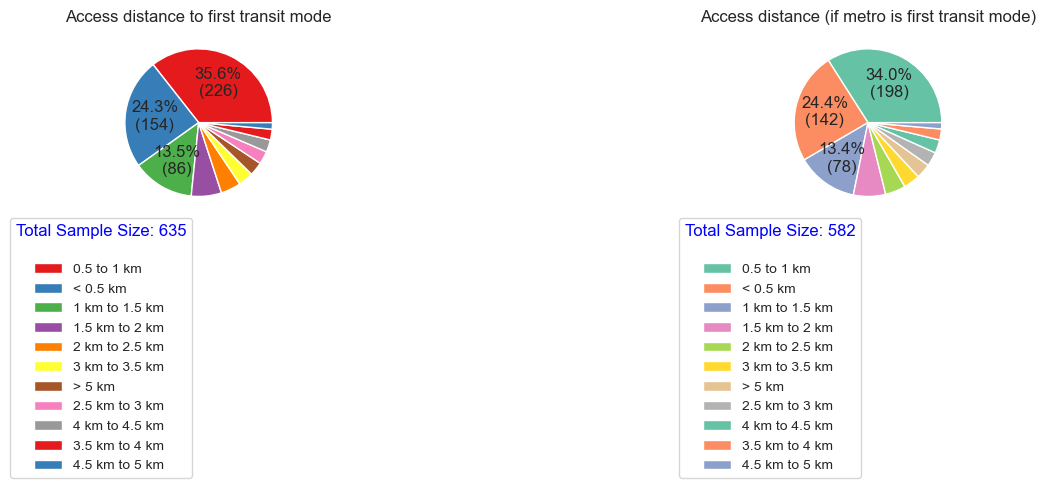

In [468]:
def func(pct, allvals, top_indices):
    absolute = int(round(pct / 100. * np.sum(allvals)))
    index = np.argmax(np.array(allvals) == absolute)
    if index in top_indices:
        return "{:.1f}%\n({:d})".format(pct, absolute)
    else:
        return ""

# Helper function to get indices of top 3 sectors
def get_top_indices(counts):
    sorted_indices = counts.argsort()[::-1]
    return sorted_indices[:3]

# Set Seaborn style
sns.set(style="whitegrid")

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

df2=df.loc[(df['8']=='Metro') | (df['8']=='Metro + Bus')]

# Define color schemes
colors_age = sns.color_palette("Set1", len(df['10b'].value_counts()))
colors_gender = sns.color_palette("Set2", len(df2['10b'].value_counts()))

# Get the size of the DataFrame
df_size = df.shape[0]
df_size2=df2.shape[0]

# Pie chart for age distribution
age_counts = df['10b'].value_counts()
top_age_indices = get_top_indices(age_counts.values)
age_counts.plot.pie(
    autopct=lambda pct: func(pct, age_counts.values, top_age_indices),
    ax=ax[0], shadow=False, colors=colors_age, labels=None
)
ax[0].set_title('Access distance to first transit mode')
ax[0].set_ylabel('')  # Remove y-label

# Add legend for age distribution with DataFrame size
age_labels = age_counts.index
legend_age = ax[0].legend(
    age_labels, loc="best", bbox_to_anchor=(0.5, 0.02),
    fontsize='small', title=f"Total Sample Size: {df_size}\n"
)
plt.setp(legend_age.get_title(), fontsize='medium', color='blue')

# Pie chart for gender distribution
gender_counts = df2['10b'].value_counts()
top_gender_indices = get_top_indices(gender_counts.values)
gender_counts.plot.pie(
    autopct=lambda pct: func(pct, gender_counts.values, top_gender_indices),
    ax=ax[1], shadow=False, colors=colors_gender, labels=None
)
ax[1].set_title('Access distance (if metro is first transit mode)')
ax[1].set_ylabel('')  # Remove y-label

# Add legend for gender distribution with DataFrame size
gender_labels = gender_counts.index
legend_gender = ax[1].legend(
    gender_labels, loc="best", bbox_to_anchor=(0.5, 0.02),
    fontsize='small', title=f"Total Sample Size: {df_size2}\n"
)
plt.setp(legend_gender.get_title(), fontsize='medium', color='blue')

plt.tight_layout()
plt.show()

In [469]:
df['11'].unique()
egress_map={'Walk ':'Walk ', 'Auto Rickshaw ':'Auto Rickshaw ', 'Drove and parked a two-Wheeler ':'Drove and parked a two-Wheeler ',
       'Ola/Uber car ':'Ola/Uber car ', 'Drove and parked a car ':'Drove and parked a car ',
       'Dropped-off by friends/family members/others using car ':'Dropped-off by others', 
       'Dropped-off by friends/family members/others using two-wheeler ':'Dropped-off by others',
       'Walk':'Walk ', 
       'Rapido/Uber moto/Ola App two-wheeler ':'Rapido/Uber moto/Ola App two-wheeler '}

df['11']=df['11'].map(egress_map)

In [470]:
display(HTML(f"<h2>Egress modes</h2>"))

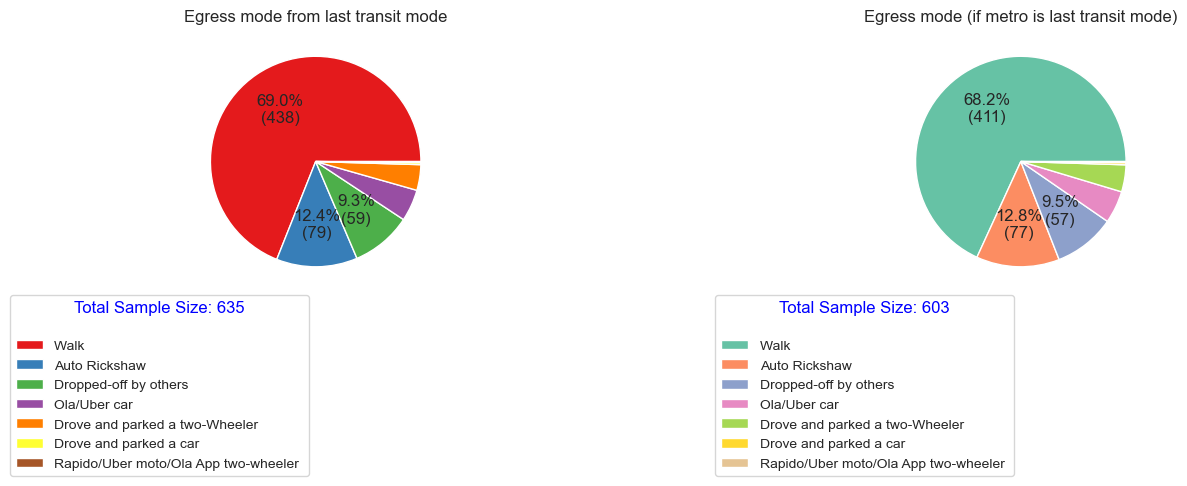

In [471]:
def func(pct, allvals, top_indices):
    absolute = int(round(pct / 100. * np.sum(allvals)))
    index = np.argmax(np.array(allvals) == absolute)
    if index in top_indices:
        return "{:.1f}%\n({:d})".format(pct, absolute)
    else:
        return ""

# Helper function to get indices of top 3 sectors
def get_top_indices(counts):
    sorted_indices = counts.argsort()[::-1]
    return sorted_indices[:3]

# Set Seaborn style
sns.set(style="whitegrid")

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

df2=df.loc[(df['8']=='Metro') | (df['8']=='Bus + Metro')]

# Define color schemes
colors_age = sns.color_palette("Set1", len(df['11'].value_counts()))
colors_gender = sns.color_palette("Set2", len(df2['11'].value_counts()))

# Get the size of the DataFrame
df_size = df.shape[0]
df_size2=df2.shape[0]

# Pie chart for age distribution
age_counts = df['11'].value_counts()
top_age_indices = get_top_indices(age_counts.values)
age_counts.plot.pie(
    autopct=lambda pct: func(pct, age_counts.values, top_age_indices),
    ax=ax[0], shadow=False, colors=colors_age, labels=None
)
ax[0].set_title('Egress mode from last transit mode')
ax[0].set_ylabel('')  # Remove y-label

# Add legend for age distribution with DataFrame size
age_labels = age_counts.index
legend_age = ax[0].legend(
    age_labels, loc="best", bbox_to_anchor=(0.5, 0.02),
    fontsize='small', title=f"Total Sample Size: {df_size}\n"
)
plt.setp(legend_age.get_title(), fontsize='medium', color='blue')

# Pie chart for gender distribution
gender_counts = df2['11'].value_counts()
top_gender_indices = get_top_indices(gender_counts.values)
gender_counts.plot.pie(
    autopct=lambda pct: func(pct, gender_counts.values, top_gender_indices),
    ax=ax[1], shadow=False, colors=colors_gender, labels=None
)
ax[1].set_title('Egress mode (if metro is last transit mode)')
ax[1].set_ylabel('')  # Remove y-label

# Add legend for gender distribution with DataFrame size
gender_labels = gender_counts.index
legend_gender = ax[1].legend(
    gender_labels, loc="best", bbox_to_anchor=(0.5, 0.02),
    fontsize='small', title=f"Total Sample Size: {df_size2}\n"
)
plt.setp(legend_gender.get_title(), fontsize='medium', color='blue')

plt.tight_layout()
plt.show()

In [472]:
display(HTML(f"<h2>Egress travel time</h2>"))

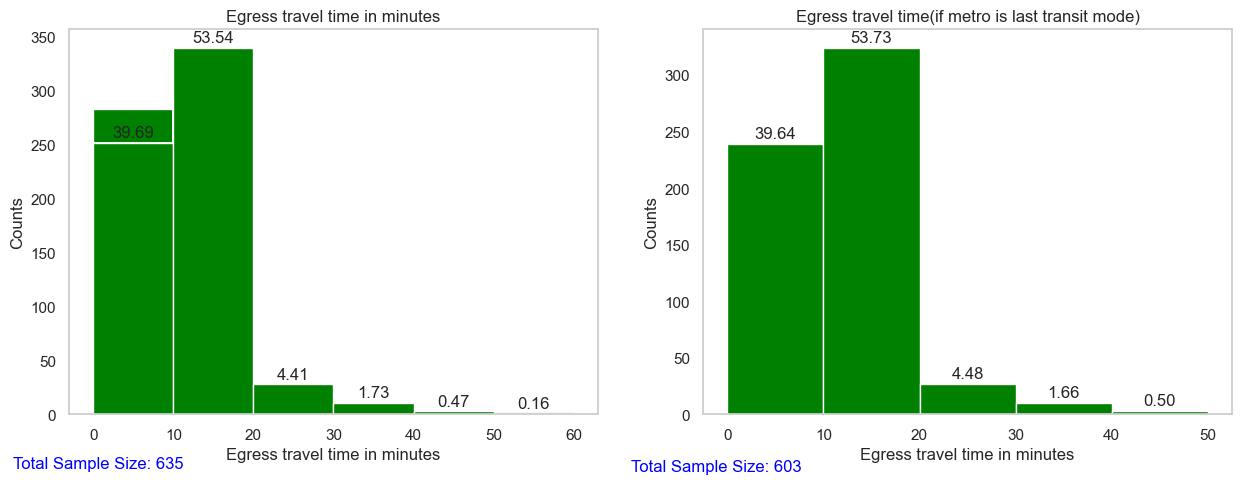

In [473]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot histogram for the left subplot
# Assuming df['10'] contains the data for the left histogram
axs[0].hist(df['10a'], bins=range(0, int(df['11a'].max()) + 10, 10), color='green')

# Add labels and title for the left subplot
axs[0].set_xlabel('Egress travel time in minutes')
axs[0].set_ylabel('Counts')
axs[0].set_title('Egress travel time in minutes')

# Add percentage on top of each bar for the left subplot
total_count_left = len(df['11a'])
for i in range(len(axs[0].hist(df['11a'], bins=range(0, int(df['11a'].max()) + 10, 10), color='green')[0])):
    count = axs[0].hist(df['11a'], bins=range(0, int(df['11a'].max()) + 10, 10), color='green')[0][i]
    percentage = count / total_count_left * 100
    axs[0].text(axs[0].hist(df['11a'], bins=range(0, int(df['11a'].max()) + 10, 10), color='green')[1][i] + 5, count + 5, f'{percentage:.2f}', ha='center')

# Add total sample size below the left plot
axs[0].text(-10, -50, f'Total Sample Size: {total_count_left}', fontsize=12,color='blue')

# Plot histogram for the right subplot
df_metro=df.loc[(df['8']=='Metro') | (df['8']=='Bus + Metro')]
# Assuming df_metro['10a'] contains the data for the right histogram where column 8 is 'Metro'
axs[1].hist(df_metro['11a'], bins=range(0, int(df_metro['11a'].max()) + 10, 10), color='green')

# Add labels and title for the right subplot
axs[1].set_xlabel('Egress travel time in minutes')
axs[1].set_ylabel('Counts')
axs[1].set_title('Egress travel time(if metro is last transit mode)')

# Add percentage on top of each bar for the right subplot
total_count_right = len(df_metro['11a'])
for i in range(len(axs[1].hist(df_metro['11a'], bins=range(0, int(df_metro['11a'].max()) + 10, 10), color='green')[0])):
    count = axs[1].hist(df_metro['11a'], bins=range(0, int(df_metro['11a'].max()) + 10, 10), color='green')[0][i]
    percentage = count / total_count_right * 100
    axs[1].text(axs[1].hist(df_metro['11a'], bins=range(0, int(df_metro['11a'].max()) + 10, 10), color='green')[1][i] + 5, count + 5, f'{percentage:.2f}', ha='center')

# Add total sample size below the right plot
axs[1].text(-10, -50, f'Total Sample Size: {total_count_right}', fontsize=12,color='blue')

axs[0].grid(False)
axs[1].grid(False)

plt.show()

In [474]:
display(HTML(f"<h2>Egress distance</h2>"))

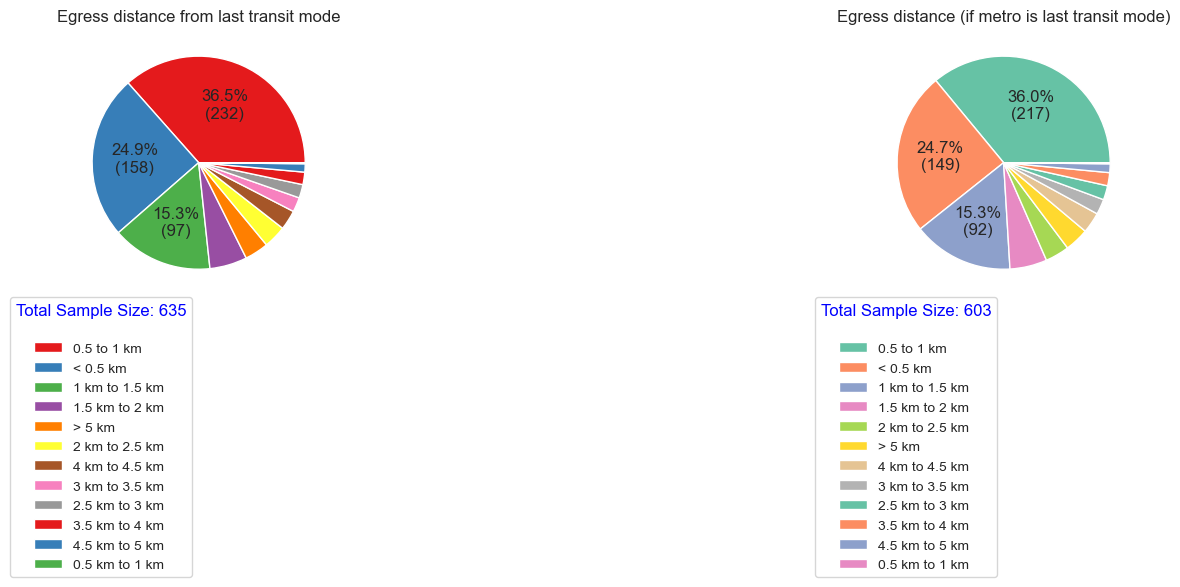

In [475]:
def func(pct, allvals, top_indices):
    absolute = int(round(pct / 100. * np.sum(allvals)))
    index = np.argmax(np.array(allvals) == absolute)
    if index in top_indices:
        return "{:.1f}%\n({:d})".format(pct, absolute)
    else:
        return ""

# Helper function to get indices of top 3 sectors
def get_top_indices(counts):
    sorted_indices = counts.argsort()[::-1]
    return sorted_indices[:3]

# Set Seaborn style
sns.set(style="whitegrid")

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

df2=df.loc[(df['8']=='Metro') | (df['8']=='Bus + Metro')]

# Define color schemes
colors_age = sns.color_palette("Set1", len(df['11b'].value_counts()))
colors_gender = sns.color_palette("Set2", len(df2['11b'].value_counts()))

# Get the size of the DataFrame
df_size = df.shape[0]
df_size2=df2.shape[0]

# Pie chart for age distribution
age_counts = df['11b'].value_counts()
top_age_indices = get_top_indices(age_counts.values)
age_counts.plot.pie(
    autopct=lambda pct: func(pct, age_counts.values, top_age_indices),
    ax=ax[0], shadow=False, colors=colors_age, labels=None
)
ax[0].set_title('Egress distance from last transit mode')
ax[0].set_ylabel('')  # Remove y-label

# Add legend for age distribution with DataFrame size
age_labels = age_counts.index
legend_age = ax[0].legend(
    age_labels, loc="best", bbox_to_anchor=(0.5, 0.02),
    fontsize='small', title=f"Total Sample Size: {df_size}\n"
)
plt.setp(legend_age.get_title(), fontsize='medium', color='blue')

# Pie chart for gender distribution
gender_counts = df2['11b'].value_counts()
top_gender_indices = get_top_indices(gender_counts.values)
gender_counts.plot.pie(
    autopct=lambda pct: func(pct, gender_counts.values, top_gender_indices),
    ax=ax[1], shadow=False, colors=colors_gender, labels=None
)
ax[1].set_title('Egress distance (if metro is last transit mode)')
ax[1].set_ylabel('')  # Remove y-label

# Add legend for gender distribution with DataFrame size
gender_labels = gender_counts.index
legend_gender = ax[1].legend(
    gender_labels, loc="best", bbox_to_anchor=(0.5, 0.02),
    fontsize='small', title=f"Total Sample Size: {df_size2}\n"
)
plt.setp(legend_gender.get_title(), fontsize='medium', color='blue')

plt.tight_layout()
plt.show()

In [476]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%d-%m-%Y %H:%M')

In [477]:
display(HTML(f"<h2>Crowding level in the metro ( while boarding )</h2>"))

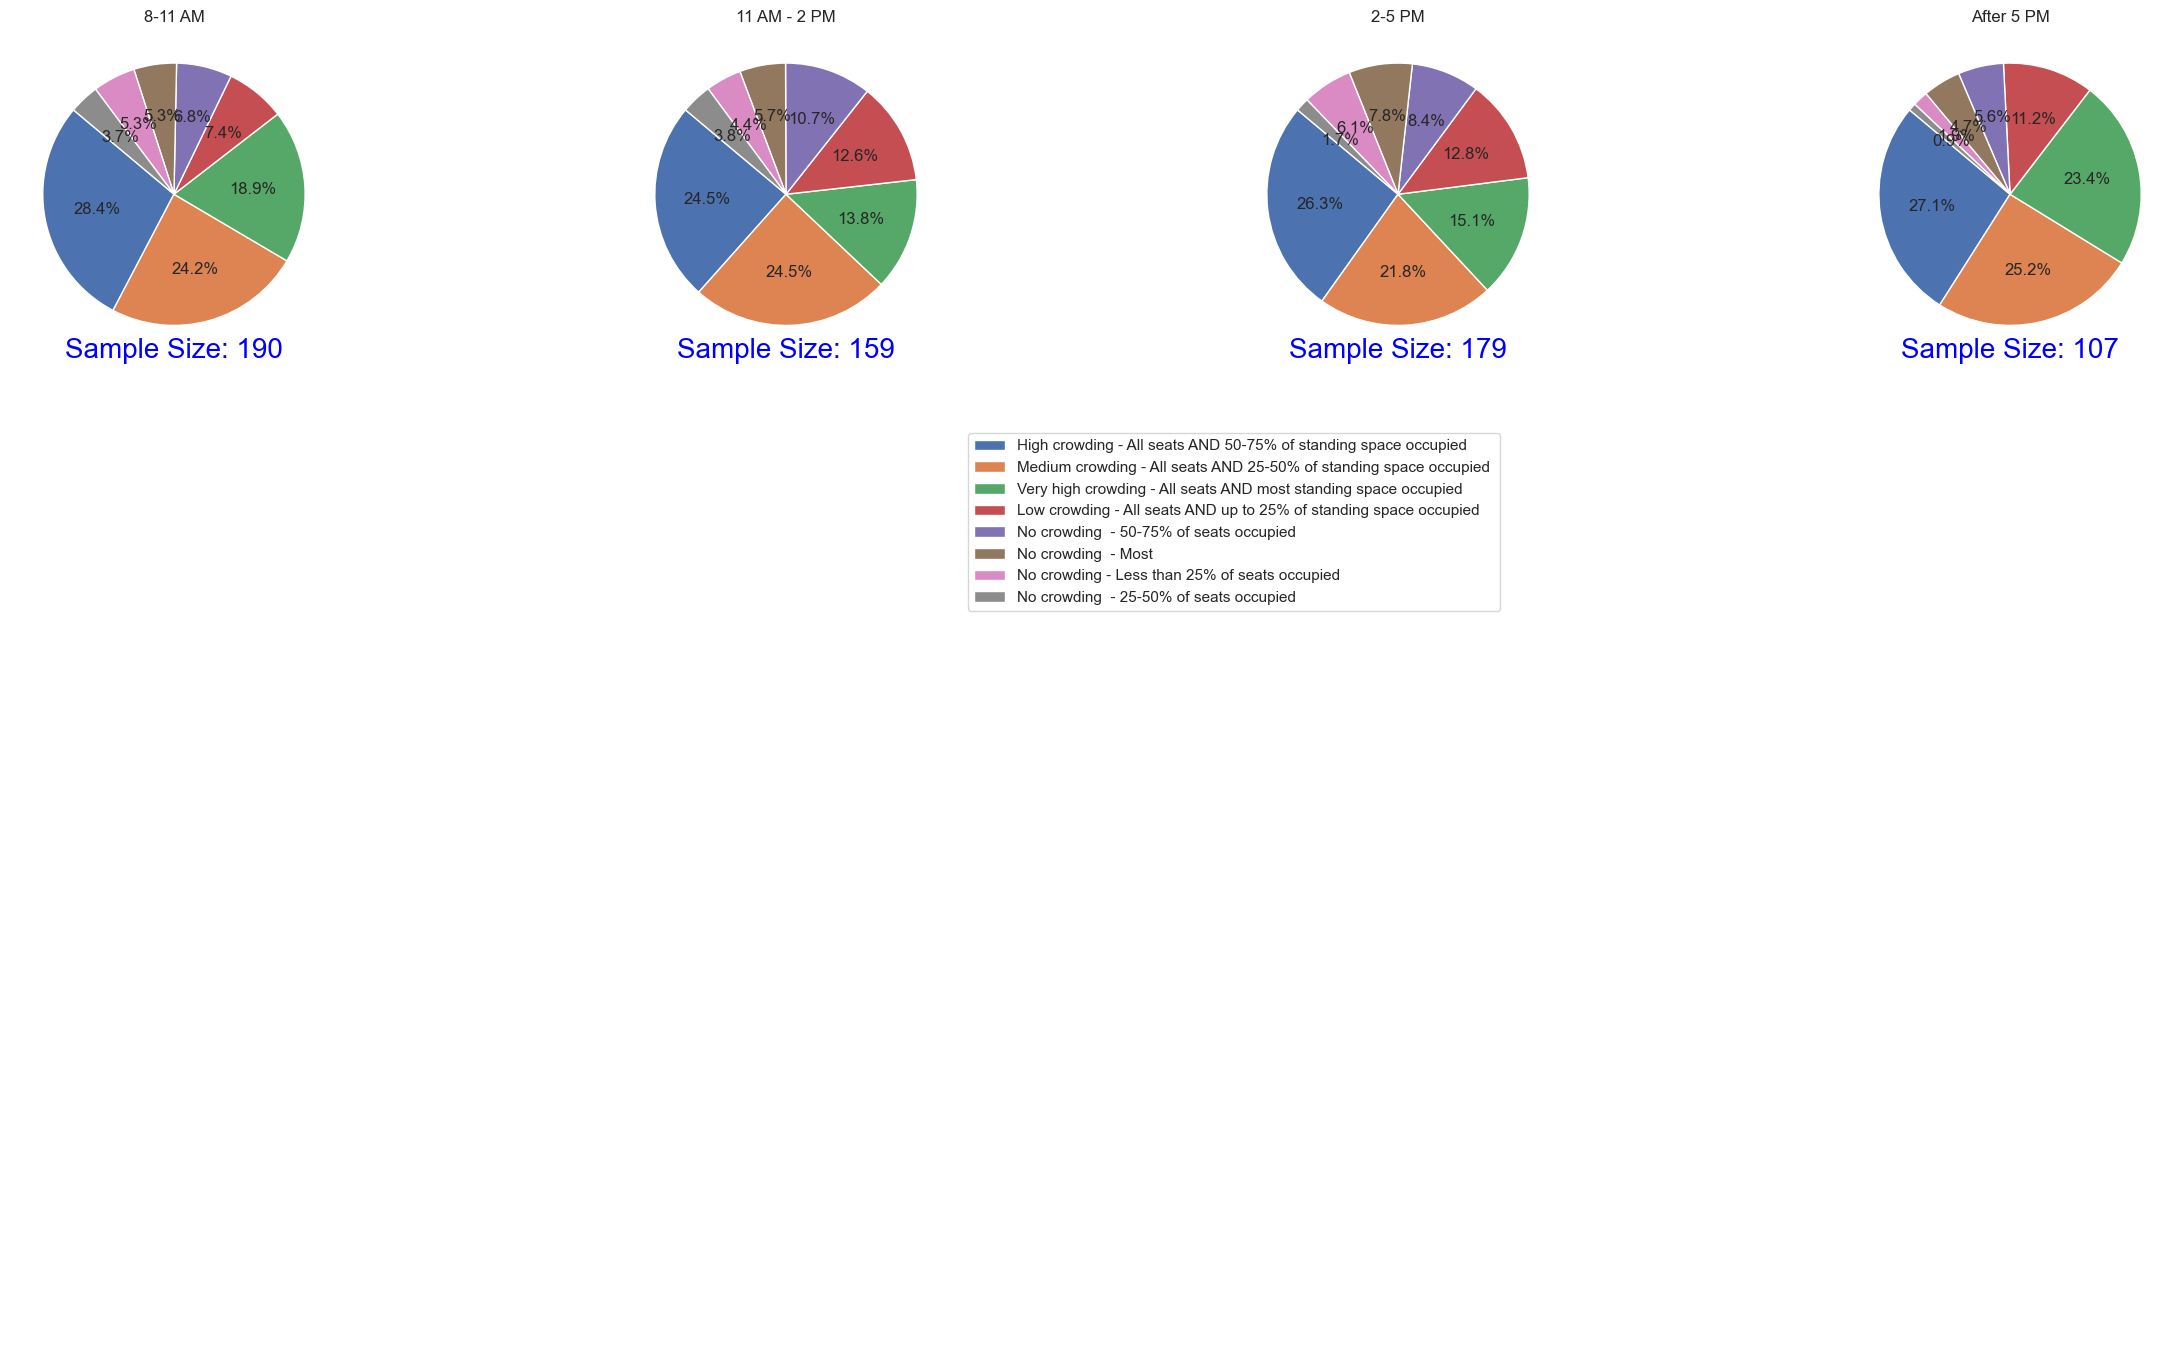

In [478]:
import matplotlib.pyplot as plt

# Define time intervals and labels
time_intervals = [(8, 11), (11, 14), (14, 17), (17, 20)]
labels = ['8-11 AM', '11 AM - 2 PM', '2-5 PM', 'After 5 PM']

# Define the column name
column = '16'

# Calculate the number of rows required
num_rows = 2
num_cols = len(time_intervals)

# Create a figure and axes for the subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(22,15))

# Iterate over each time interval and plot a pie chart
for i, (start, end) in enumerate(time_intervals):
    # Filter dataframe based on the time interval
    filtered_df = df[(df['Timestamp'].dt.hour >= start) & (df['Timestamp'].dt.hour < end)]
    
    # Calculate value counts for the column
    counts = filtered_df[column].value_counts()
    
    # Calculate the position of the subplot
    row_index = i // num_cols
    col_index = i % num_cols
    
    # Plot the pie chart without labels
    axs[row_index, col_index].pie(counts, labels=None, autopct='%1.1f%%', startangle=140)
    
    # Set title for the pie chart
    axs[row_index, col_index].set_title(labels[i])
    
    # Calculate sample size
    sample_size = len(filtered_df)
    
    # Add sample size text annotation below each pie chart
    axs[row_index, col_index].text(0.5, 0, f'Sample Size: {sample_size}', color='blue', fontsize=20, ha='center', transform=axs[row_index, col_index].transAxes)

# Add a common legend for all pie charts
legend = axs[0, 2].legend(loc='center', bbox_to_anchor=(0, -0.5), labels=counts.index)

# Hide the empty subplots
for i in range(num_rows):
    for j in range(num_cols):
        if (i == 0 and j >= 4) or (i == 1 and j < 4):
            axs[i, j].axis('off')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [496]:
display(HTML(f"<h2>Sample counts at different stations</h2>"))

In [479]:
station_dict={'Nadaprabhu Kempegowda Station, Majestic ':'Majestic','Dr. B. R. Ambedkar Station, Vidhana Soudha ':'Vidhana Soudha',
              'Mantri Square Sampige Road ':'Mantri Square','Sir.M.Visvesvaraya Stn., Central College ':'Central College',
              'Benniganahalli - Tin factory ':'Benniganahalli','Whitefield - Kadugodi ':'Whitefield','Kengeri Bus Terminal ':'Kengeri BT',
              'Krishnarajapuram - K.R.Puram ':'KR Puram','Rashtreeya Vidyalaya Road ':'RV Road','Hopefarm Channasandra ':'Hopefarm',
              'Krantivira Sangolli Rayanna Railway Station ':'Krantivira','Mahakavi Kuvempu Road ':'Mahakavi Kuvempu',
              'Krishna Rajendra Market ':'KR Market','Sri Sathya Sai Hospital ':'Sathya Sai','Swami Vivekananda Road ':'Vivekananda Road',
              'Pantharapalya - Nayandahalli ':'Pantharapalya','Sri Balagangadharanatha Swamiji Station, Hosahalli ':'Hosahalli'
              ,'Rajarajeshwari Nagar ':'RR Nagar'}
df['2c']=df['2c'].map(station_dict).fillna(df['2c'])
df['2d']=df['2d'].map(station_dict).fillna(df['2d'])

In [480]:
# Get value counts for column '2c'
value_counts_2c = df['2c'].value_counts()

# Get value counts for column '2d'
value_counts_2d = df['2d'].value_counts()

# Combine the value counts for both columns
combined_value_counts = value_counts_2c.add(value_counts_2d, fill_value=0)

combined_value_counts = combined_value_counts.astype(int)

# Sort the combined value counts in descending order
combined_value_counts_sorted = combined_value_counts.sort_values(ascending=False)

# Calculate the midpoint for splitting the data
midpoint = len(combined_value_counts_sorted) // 3

# Print the table with three pairs of stations and sample counts in a row
print("Station              Sample count      | Station              Sample count      | Station              Sample count")
print("---------------------------------------+----------------------------------------+-----------------------------------")
for i in range(min(midpoint, len(combined_value_counts_sorted))):
    station_1, count_1 = combined_value_counts_sorted.index[i], combined_value_counts_sorted.iloc[i]
    station_2, count_2 = combined_value_counts_sorted.index[midpoint + i], combined_value_counts_sorted.iloc[midpoint + i]
    station_3, count_3 = combined_value_counts_sorted.index[midpoint * 2 + i], combined_value_counts_sorted.iloc[midpoint * 2 + i]
    print(f"{station_1:<20}   {count_1:<15} | {station_2:<20}   {count_2:<15} | {station_3:<20}       {count_3:<15}")


Station              Sample count      | Station              Sample count      | Station              Sample count
---------------------------------------+----------------------------------------+-----------------------------------
Majestic               86              | Cubbon Park            24              | Srirampura                 14             
Challaghatta           44              | Jnanabharathi          24              | KR Market                  12             
Attiguppe              39              | Jayaprakash Nagar      20              | Central College            12             
Mahalakshmi            38              | Yelachenahalli         20              | Krantivira                 11             
Nagasandra             37              | Benniganahalli         20              | Vajarahalli                11             
Jayanagar              37              | Sandal Soap Factory    20              | Lalbagh                    10             
Vijayanagar      

In [481]:
abbrevation_form_map={'Konanakunte Cross ':'KNC', 'Nagasandra ':'NAG', 'Yelachenahalli ':'YEL',
       'Mahalakshmi ':'MAH', 'Baiyappanahalli ':'BAI', 'Majestic':'MAJ', 'Mahakavi Kuvempu':'MKV', 'Vidhana Soudha':'VID', 'Mantri Square':'MAN', 'Benniganahalli':'BEN', 'Dasarahalli ':'DAS', 
       'Yeshwanthpur ':'YSH',  'Mysore Road ':'MYS', 'Trinity ':'TRI', 'Whitefield ':'WFI', 'Kadugodi Tree Park ':'KTP', 'Halasuru ':'HAS', 'Lalbagh ':'LBH', 'Jayaprakash Nagar':'JPN',
         'KR Puram':'KRP', 'Cubbon Park ':'CUB', 'Goraguntepalya ':'GOR', 'Garudacharapalya ':'GAR', 'Indiranagar ':'IND', 'RV Road':'RVR', 'Attiguppe ':'ATG', 'Jnanabharathi ':'JNA',
           'Mahatma Gandhi Road ':'MGR',  'Kengeri ':'KEN', 'Central College':'CEN', 'Nallurhalli ':'NAL', 'Vivekananda Road':'VVR', 'Magadi Road ':'MAG', 'Jayanagar ':'JAY', 'Kengeri BT':'KBT',
             'National College ':'NAT', 'Srirampura ':'SRI','South End Circle ':'SOU', 'Sandal Soap Factory ':'SAN', 'Vajarahalli ':'VAJ', 'Vijayanagar ':'VIJ', 'Rajajinagar ':'RAJ', 
             'Singayyanapalya ':'SIN', 'RR Nagar':'RRN', 'Thalaghattapura ':'THA','Hosahalli':'HOS', 'Doddakallasandra ':'DOD', 'Pantharapalya':'PAN', 'Deepanjali Nagar ':'DPN', 'Krantivira':'KRA', 
             'Seetharampalya ':'SEE', 'Hopefarm':'HOP', 'Pattandur Agrahara ':'PAT', 'Pattanagere ':'PAN', 'Kundalahalli ':'KUN', 'KR Market':'KRM', 'Peenya ':'PEN', 'Peenya Industry ':'PEI',
              'Hoodi ':'HOO', 'Silk Institute ':'SIL', 'Challaghatta ':'CHA', 'Jalahalli ':'JAL', 'Banashankari ':'BAN','Whitefield':'WHF','Jayaprakash Nagar ':'JPN','Chickpet ':'CHK',
              'Sathya Sai':'SAI'}
 

df['2c']=df['2c'].map(abbrevation_form_map).fillna(df['2c'])
df['2d']=df['2d'].map(abbrevation_form_map).fillna(df['2d'])

# df['2c'].unique()

In [482]:
# df['2d'].unique()

In [483]:
display(HTML(f"<h2>Access mode to metro across different metro stations</h2>"))

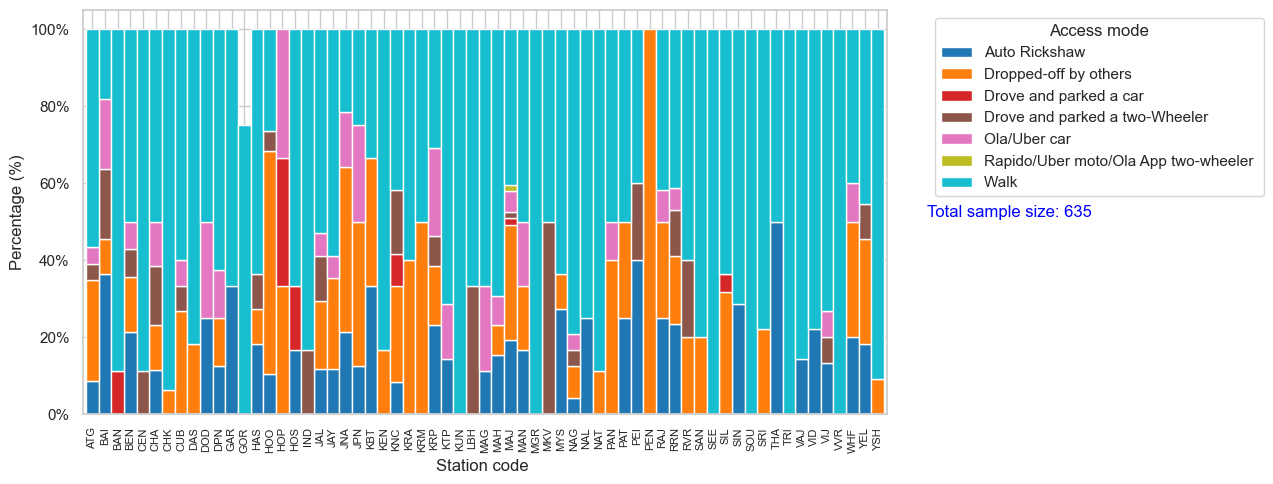

In [484]:
grouped = df.groupby(['2c', '10']).size().unstack().div(df.groupby('2c').size(), axis=0)

# Plotting the stacked bar chart
fig, ax = plt.subplots(figsize=(13, 5))
grouped.plot(kind='bar', stacked=True, colormap='tab10', ax=ax,width=1)
plt.xlabel('Station code ')
plt.ylabel('Percentage (%)')
plt.xticks(fontsize=8, rotation=90)
# Formatting y-axis ticks as percentages
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x * 100:.0f}%'))

# Customize legend and move it outside the plot
legend = ax.legend(title='Access mode', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add the size of the DataFrame under the legend in blue color
df_size_text = f'Total sample size: {len(df)}'
plt.text(1.05, 0.5, df_size_text, transform=ax.transAxes, color='blue', fontsize=12, va='center', ha='left')

# Show the plot
plt.tight_layout()
plt.show()

In [485]:
display(HTML(f"<h2>Egress mode to metro across different metro stations</h2>"))

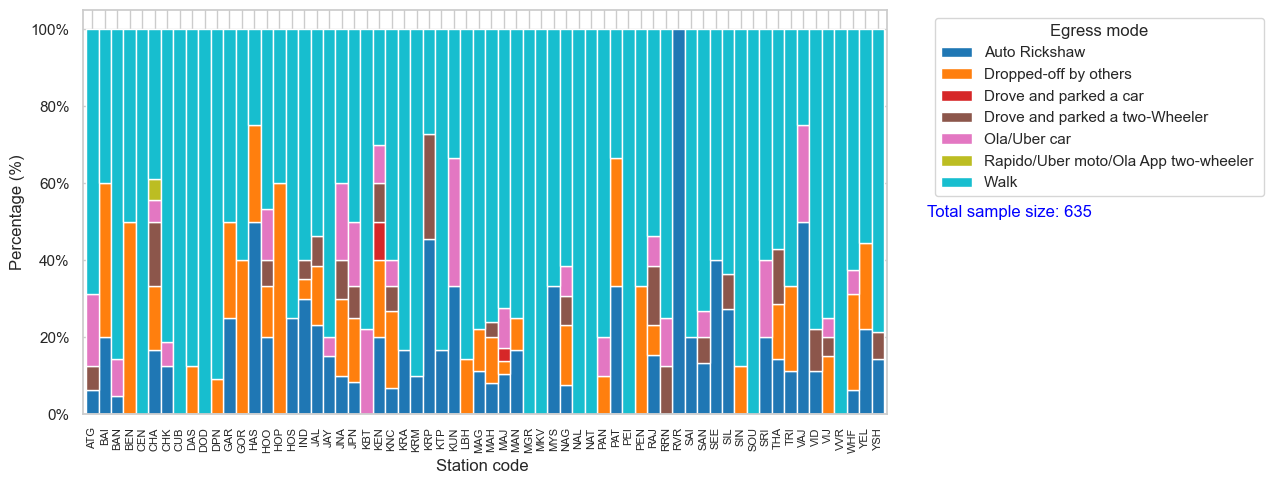

In [486]:
grouped = df.groupby(['2d', '11']).size().unstack().div(df.groupby('2d').size(), axis=0)

# Plotting the stacked bar chart
fig, ax = plt.subplots(figsize=(13, 5))
grouped.plot(kind='bar', stacked=True, colormap='tab10', ax=ax,width=1)
plt.xlabel('Station code ')
plt.ylabel('Percentage (%)')
plt.xticks(fontsize=8, rotation=90)
# Formatting y-axis ticks as percentages
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x * 100:.0f}%'))

# adjust the size of xticks


# Customize legend and move it outside the plot
legend = ax.legend(title='Egress mode', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add the size of the DataFrame under the legend in blue color
df_size_text = f'Total sample size: {len(df)}'
plt.text(1.05, 0.5, df_size_text, transform=ax.transAxes, color='blue', fontsize=12, va='center', ha='left')

# Show the plot
plt.tight_layout()
plt.show()

In [487]:
display(HTML(f"<h2>Preference for using public sharing system for metro access/egress</h2>"))

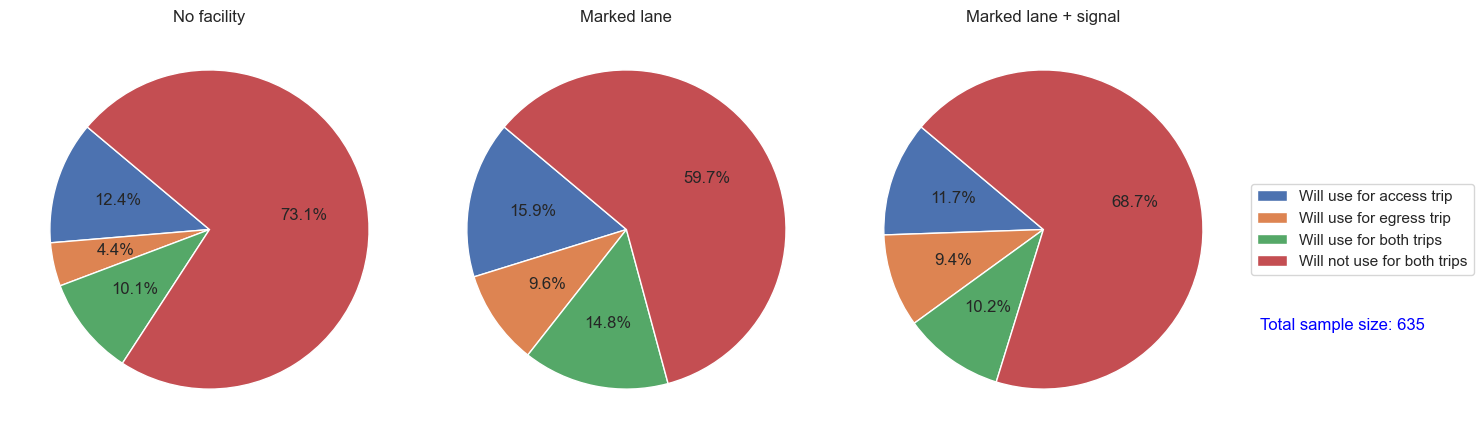

In [488]:
columns = ['12c(a)', '12c(b)', '12c(c)']

# Define the order of legend and values
list_order = ['Will use for access trip', 'Will use for egress trip', 'Will use for both trips', 'Will not use for both trips']

# Define individual titles for each plot
titles = ['No facility', 'Marked lane', 'Marked lane + signal']

# Initialize the figure
plt.figure(figsize=(15, 5))

# Loop through each column to create pie charts
for i, column in enumerate(columns, 1):
    plt.subplot(1, 3, i)
    # Ensure the values appear in the specified order
    values = [df[column].value_counts().get(label, 0) for label in list_order]
    plt.pie(values, autopct='%1.1f%%', startangle=140)
    plt.title(titles[i-1])

# Add a common legend for all pie charts
plt.legend(list_order, loc='center left', bbox_to_anchor=(1, 0.5))

df_size_text = f'Total sample size: {len(df)}'
plt.figtext(0.9, 0.3, df_size_text, wrap=True, horizontalalignment='center', fontsize=12, color='blue')

# Display the plots
plt.tight_layout()
plt.show()

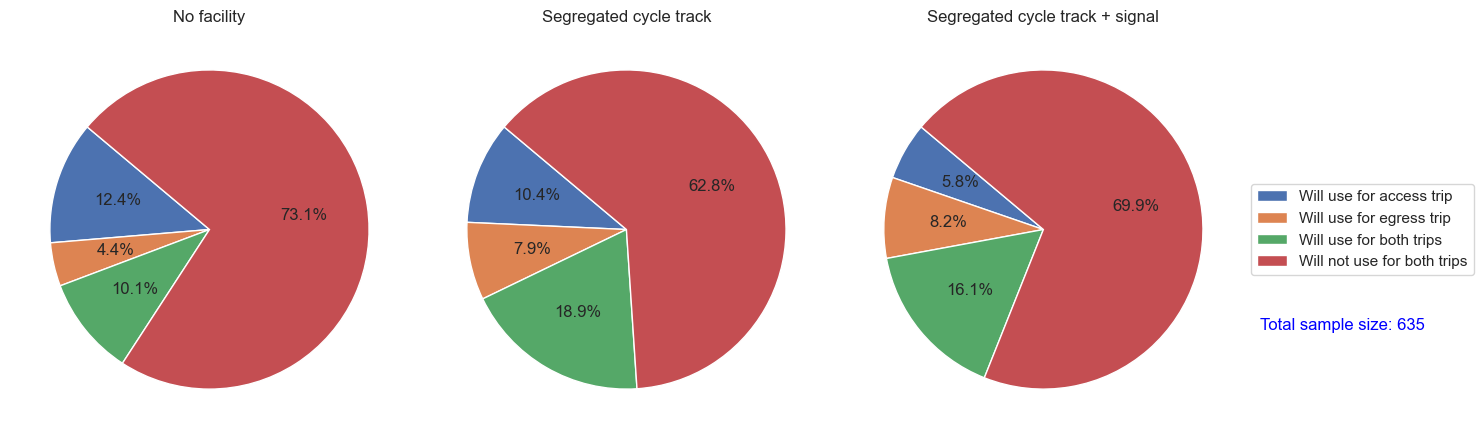

In [489]:
columns = ['12c(a)', '12c(d)', '12c(e)']

# Define the order of legend and values
list_order = ['Will use for access trip', 'Will use for egress trip', 'Will use for both trips', 'Will not use for both trips']

# Define individual titles for each plot
titles = ['No facility', 'Segregated cycle track', 'Segregated cycle track + signal']

# Initialize the figure
plt.figure(figsize=(15, 5))

# Loop through each column to create pie charts
for i, column in enumerate(columns, 1):
    plt.subplot(1, 3, i)
    # Ensure the values appear in the specified order
    values = [df[column].value_counts().get(label, 0) for label in list_order]
    plt.pie(values, autopct='%1.1f%%', startangle=140)
    plt.title(titles[i-1])

# Add a common legend for all pie charts
plt.legend(list_order, loc='center left', bbox_to_anchor=(1, 0.5))

df_size_text = f'Total sample size: {len(df)}'
plt.figtext(0.9, 0.3, df_size_text, wrap=True, horizontalalignment='center', fontsize=12, color='blue')

# Display the plots
plt.tight_layout()
plt.show()

In [490]:
display(HTML(f"<h2>Preference for using own bicycle if parking facility is provided at metro stations</h2>"))

In [491]:
parking_dict={'No, I will not use a bicycle. ':'Will not use',
       'Current travelling conditions with no special cycling facility. Per Trip cost 0₹. Parking cost of 10₹ per day. ':'Current conditions',
       'If a marked cycle lane is provided. Per Trip cost 1₹. Parking cost 10₹ per day. ':'Marked lane',
       'Not Applicable- because neither of my trip end is home. ':'Not Applicable',
       'If a marked cycle lane provided along with bicycle traffic signals is provided. Per Trip cost 2₹. Parking cost 10₹ per day. ':'Marked lane + signal',
       'If a segregated cycle track is provided. Per Trip cost 3₹.. Parking cost 10₹ per day. ':'Segregated track',
       'If a segregated cycle track with bicycle signal is provided. Per Trip cost 4₹. Parking cost 10₹ per day. ':'Segregated track + signal',
       'If a segregated cycle track provided along with bicycle traffic signals. At traffic signals, there is a separate signal phase for bicycle movement.Additional cost Per Trip 4₹ . .                                                                                                                                                                     .':
       'Segregated track + signal',
       'If a segregated cycle track is provided. At traffic signals, no separate signal phase for bicycle movement.Additional cost Per Trip 3₹ .':'Segregated track',
       'If a marked cycle lane is provided along with bicycle traffic signals. At traffic signals, there is a separate signal phase for bicycle movement.Additional cost Per Trip 2₹.  ':'Marked lane + signal',
       'If a marked cycle lane is provided. At traffic signals, no separate signal phase for bicycle movement.Additional cost Per Trip 1₹. ':'Marked lane',
       'Current travelling conditions with no special cycling facility.Additional cost Per Trip 0₹. ಯಾವುದೇ ವಿಶೇಷ ಸೈಕ್ಲಿಂಗ್ ಸೌಲಭ್ಯವಿಲ್ಲದೆ ಪ್ರಸ್ತುತ ಪ್ರಯಾಣದ ಪರಿಸ್ಥಿತಿಗಳು. ಪ್ರತಿ ಪ್ರವಾಸಕ್ಕೆ ಹೆಚ್ಚುವರಿ ವೆಚ್ಚ 0₹':'Current conditions',}

df['23']=df['23'].map(parking_dict).fillna(df['23'])

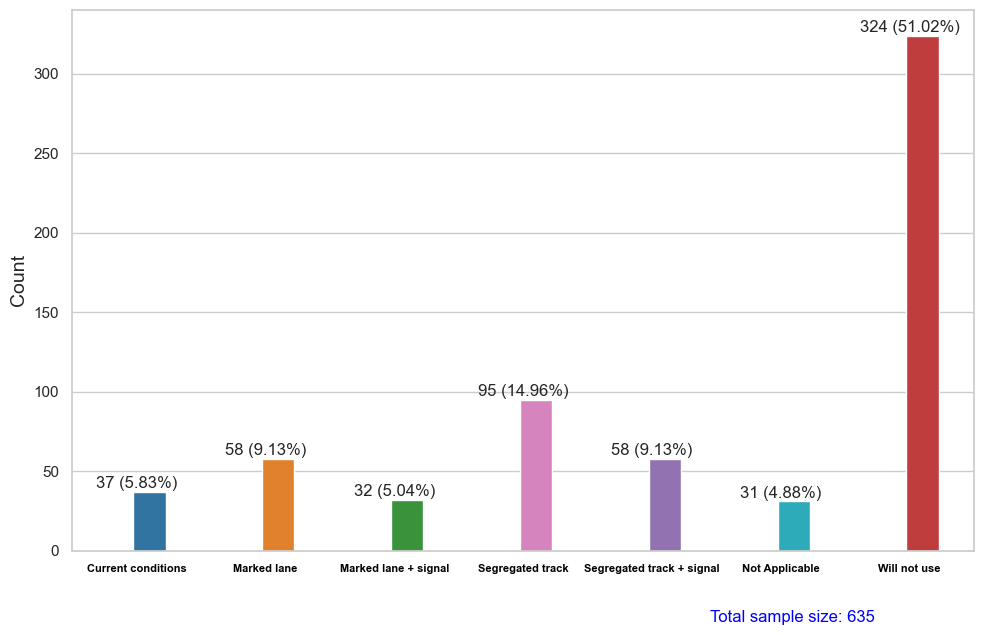

In [492]:
# Define the ordered list of categories
ordered_list = ['Current conditions', 'Marked lane', 'Marked lane + signal', 
                'Segregated track','Segregated track + signal', 'Not Applicable', 'Will not use']

# Reorder the categories in column 23 based on the ordered list
df.loc[:, '23'] = pd.Categorical(df['23'], categories=ordered_list, ordered=True)

# Count the number of entries for each category
counts = df['23'].value_counts()

# Sort the counts based on the ordered list
counts = counts.reindex(ordered_list)

# Calculate the total count
total_count = counts.sum()

# Define colors for the bars
colors = ['#1f77b4', '#ff7f0e', '#2ca02c','#e377c2' , '#9467bd', '#17becf', '#d62728']

# Plot the bar chart with adjusted bar width
bar_width = 0.25  # Adjust bar width here
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=counts.index, y=counts.values, palette=colors, dodge=False, errorbar=None)

# Adjust the width of the bars
for bar in ax.patches:
    bar.set_width(bar_width)
    bar.set_x(bar.get_x() + (1 - bar_width) / 2)  # Center the bars

# Add count values and percentages on top of each bar
for i, count in enumerate(counts):
    percentage = round((count / total_count) * 100, 2)
    ax.text(i, count + 0.5, f'{count} ({percentage}%)', ha='center', va='bottom', fontsize=12)

# Add category labels directly on the x-axis with matching colors
ax.set_xticklabels(counts.index, rotation=0, ha='center', fontsize=12, fontweight='bold', color='black')

# Color the x-axis labels to match the bar colors
# for xtick, color in zip(ax.get_xticklabels(), colors):
#     xtick.set_color(color)

# plt.title('Response to willingness to use bicycle when parking is provided', fontsize=16)
plt.xlabel('', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0, fontsize=8)

df_size_text = f'Total sample size: {len(df)}'
plt.figtext(0.8, -0.05, df_size_text, wrap=True, horizontalalignment='center', fontsize=12, color='blue')

plt.tight_layout()
plt.show()


In [493]:
map_24={'Need to carry things or travelling with someone. ':'Need to carry things or travelling with someone. ',
       'Cannot ride a bicycle or health constraints. ':'Cannot ride a bicycle or health constraints. ',
       'Do not feel safe about traffic along my route. ':'Do not feel safe about traffic along my route. ',
       'Concerns about being tired and sweaty. ':'Concerns about being tired and sweaty. ',
       'Concern about pollution along my route. ':'Concern about pollution along my route. ',
       'The distance between metro station and home is in walkable distance ':'Short distance',
       'Cannot ride a bicycle or health constraints. , uncomfortable to ride bicycle ': 'Cannot ride a bicycle or health constraints. ',
       'Cannot ride a bicycle or health constraints. , uncomfortable ': 'Cannot ride a bicycle or health constraints. ',
       'Concerns about road quality such as potholes. ':'Concerns about road quality such as potholes. ',
       'My working place is nearby I can walk ':'Short distance',
       "I don't know how to ride bicycle ":'Cannot ride a bicycle or health constraints. ',
       'Not required. Since shorter distance.':'Short distance',
        'I prefer motor cycle.':'Prefer motor vehicle',
       'Do not feel safe about traffic along my route. , Uncomfortable, aged': 'Cannot ride a bicycle or health constraints. ',
       'Concerns about being tired and sweaty. , feels uncomfortable ':'Concerns about being tired and sweaty. ,',
       'Cannot ride a bicycle or health constraints. , Uncomfortable in saree, age issues': 'Cannot ride a bicycle or health constraints. ',
       'Cannot ride a bicycle or health constraints. , Aged': 'Cannot ride a bicycle or health constraints. ',
       'Need to carry things or travelling with someone. , Both origin and desitination are near to metrostation':'Short distance',
       'Concerns about being tired and sweaty. , Aged': 'Cannot ride a bicycle or health constraints. ',
       'Both metro stations are near ':'Short distance',
       'Cannot ride a bicycle or health constraints. , aged': 'Cannot ride a bicycle or health constraints. ',
       'Do not feel safe about traffic along my route. , Not near to my home location ':'Very long distance',
       'Not near to my location ':'Very long distance',
       'Not required. Since short distance can be done by walking.':'Short distance',
       "I don't know how to ride cycle": 'Cannot ride a bicycle or health constraints. ',
       'Need to carry things or travelling with someone. , Walkable distance from home to metro station ':'Short distance',
       'Cannot ride a bicycle or health constraints. , Metro station are not near by home location ':'Short distance',
       'Cannot ride a bicycle or health constraints. , Uncomfortable in saree': 'Cannot ride a bicycle or health constraints. ',
       "Do not feel safe about traffic along my route. , Don't know to use bicycle ": 'Cannot ride a bicycle or health constraints. ',
       'Need to carry things or travelling with someone. , Feel uncomfortable ':'Need to carry things or travelling with someone. ',
       "Concerns about being tired and sweaty. , Walkable distance from home and I don't like to ride bicycle ":'Short distance',
       'Walkable distance from home ':'Short distance',
       "Cannot ride a bicycle or health constraints. , Had leg injury can't ride cycle": 'Cannot ride a bicycle or health constraints. ',
       "Concerns about being tired and sweaty. , I don't like to use bicycle ":'Concerns about being tired and sweaty. ',
       'Walkable distance from home to metro station ':'Short distance',
       'Walkable distance ':'Short distance',
       'Do not feel safe about traffic along my route. , Uncomfortable in saree ':'Do not feel safe about traffic along my route. ',
       'Cannot ride a bicycle or health constraints. , both are in walkable distance ':'Short distance',
        "Walkable distance, so I don't wish to use cycel":'Short distance'}

df['24']=df['24'].map(map_24).fillna(df['24'])

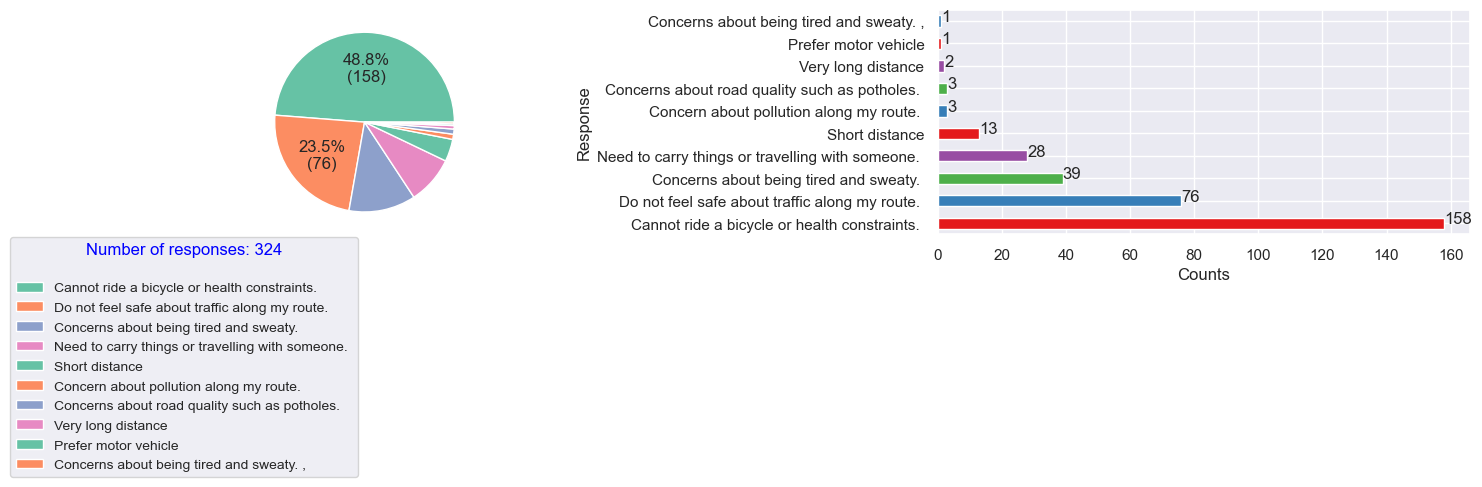

In [494]:
display(HTML(f"<h2>Reasons for not willing to use own bicycle</h2>"))


def func(pct, allvals, top_indices):
    absolute = int(round(pct / 100. * np.sum(allvals)))
    index = np.argmax(np.array(allvals) == absolute)
    if index in top_indices:
        return "{:.1f}%\n({:d})".format(pct, absolute)
    else:
        return ""

# Helper function to get indices of top sectors
def get_top_indices(counts, n=2):
    sorted_indices = counts.argsort()[::-1]
    return sorted_indices[:n]

# Set Seaborn style
sns.set(style="darkgrid")

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Define color schemes
colors_gender = sns.color_palette("Set2", len(df['8'].value_counts()))
colors_age = sns.color_palette("Set1", len(df['8'].value_counts()))

# Get the size of the DataFrame
df_size = df.shape[0]

# Pie chart for gender distribution
gender_counts = df['24'].value_counts()
top_gender_indices = get_top_indices(gender_counts.values)
gender_counts.plot.pie(
    autopct=lambda pct: func(pct, gender_counts.values, top_gender_indices),
    ax=ax[0], shadow=False, colors=colors_gender, labels=None
)
# ax[0].set_title('Gender Distribution')
ax[0].set_ylabel('')  # Remove y-label

non_na_count = df['24'].count()

# Add legend for gender distribution with DataFrame size
gender_labels = gender_counts.index
legend_gender = ax[0].legend(
    gender_labels, loc="best", bbox_to_anchor=(0.5, 0.02),
    fontsize='small', title=f"Number of responses: {non_na_count}\n"
)
plt.setp(legend_gender.get_title(), fontsize='medium', color='blue')

# Horizontal bar chart for age distribution
age_counts = df['24'].value_counts()
age_counts.plot.barh(ax=ax[1], color=colors_age)
ax[1].set_xlabel('Counts')
ax[1].set_ylabel('Response')
# ax[1].set_title('Age Distribution')
for index, value in enumerate(age_counts):
    ax[1].text(value, index, str(value))

plt.tight_layout()
plt.show()